# Drylab: Genome-wide CRIPSRa screen analysis

In [2]:
import lamindb as ln
import lnschema_bionty as lb
import pandas as pd

ln.track()

✅ loaded instance: laminlabs/lamindata (lamindb 0.51.0)
💡 notebook imports: lamindb==0.51.0 lnschema_bionty==0.29.0 pandas==1.5.3
✅ saved: Transform(id='PtTXoc0RbOIqFn', name='Drylab: Genome-wide CRIPSRa screen analysis', short_name='4-analyze-assay', version='6', type=notebook, updated_at=2023-08-25 20:15:41, created_by_id='FBa7SHjn')
✅ saved: Run(id='X9vulHz0vNGabNt4oeY2', run_at=2023-08-25 20:15:41, transform_id='PtTXoc0RbOIqFn', created_by_id='FBa7SHjn')


## Download assay readout from wetlab

In [3]:
file = ln.File.filter(id="IqLXOaxqXG1k1uVVRaox").one()

In [4]:
file.describe()

💡 File(id='IqLXOaxqXG1k1uVVRaox', key=None, suffix='.csv', accessor=None, description='CRIPSRa GWS IFNG readout 2023-08-25.csv', version=None, size=1729685, hash='cUSH0oQ2w-WccO8_ViKRAQ', hash_type='md5', created_at=2023-08-25 20:00:02, updated_at=2023-08-25 20:00:03)

Provenance:
    🗃️ storage: Storage(id='D9BilDV2', root='s3://lamindata', type='s3', region='us-east-1', updated_at=2023-08-25 20:05:02, created_by_id='kmvZDIX9')
    🖥️ transform: Transform(id='nF5ZofU5w9xIP7', name='file_upload', version='0.6.0', type='app', updated_at=2023-08-25 20:12:18, created_by_id='kmvZDIX9')
    👣 run: Run(id='gXoOEhc8p2hHq6sGwvye', run_at=2023-08-25 20:00:02, transform_id='nF5ZofU5w9xIP7', created_by_id='kmvZDIX9')
    👤 created_by: User(id='UBGZflx2', handle='laminapp-admin', email='support@lamin.ai', updated_at=2023-08-25 19:56:28)



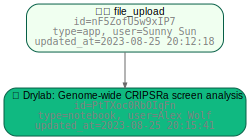

In [6]:
ln.run_context.transform.view_parents()

## Perform analysis and ingest results into LaminDB

Let's assume we performed analysis from raw data `df_raw`, now we generated two new data objects:
- df: a new df containing lots of columns of statistics.
- hits: a subsetted dataframe containing hits of the screen.

In [5]:
df_raw = file.load()

💡 adding file IqLXOaxqXG1k1uVVRaox as input for run X9vulHz0vNGabNt4oeY2, adding parent transform nF5ZofU5w9xIP7
... downloading IqLXOaxqXG1k1uVVRaox.csv: 1.00


In [7]:
df = df_raw.set_index("id")
df.head()

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
MAP4K1,12,5.286000e-24,2.615000e-07,0.000081,1,11,-2.8128,1.0,1.0,1.0,18914,0,-2.8128
SLA2,12,5.725000e-20,2.615000e-07,0.000081,2,12,-2.3390,1.0,1.0,1.0,18930,0,-2.3390
MUC1,12,2.467000e-16,2.615000e-07,0.000081,3,12,-2.1793,1.0,1.0,1.0,18919,0,-2.1793
JMJD1C,12,4.316200e-16,2.615000e-07,0.000081,4,12,-2.1524,1.0,1.0,1.0,18923,0,-2.1524
LAT2,12,1.438200e-15,2.615000e-07,0.000081,5,12,-2.6588,1.0,1.0,1.0,18922,0,-2.6588


In [8]:
hits_df = df[df["pos|fdr"] < 0.01].copy()

## Register the screen hits

In [9]:
file_hits = ln.File(hits_df, description="hits from schmidt22 crispra GWS")

❗ returning existing file with same hash: File(id='iIcWFDS907iQpE3p9Y8H', suffix='.parquet', accessor='DataFrame', description='hits from schmidt22 crispra GWS', size=18368, hash='crrgwHZ0k40QJDCC7Fdl4g', hash_type='md5', updated_at=2023-07-26 12:46:37, storage_id='D9BilDV2', transform_id='ERfuoKcyP9npz8', run_id='dQwznFbmj3usCipLn5sN', created_by_id='bKeW4T6E')


In [10]:
file_hits.save()

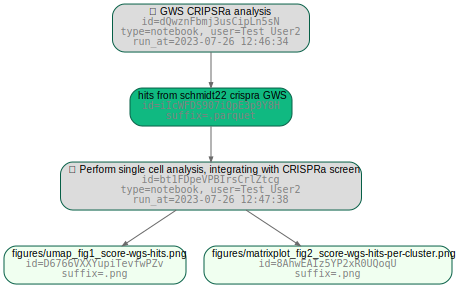

In [11]:
file_hits.view_lineage()

Label the file:

In [23]:
file_hits.feature_sets.through.objects.all().df().head(50)

,file_id,feature_set_id,slot
id,,,
1,1ZAG6nmrleH3Xg5t40rJ,0vZSY99ecZFiPEKrM3M_,None
2,1ZAG6nmrleH3Xg5t40rJ,WE-bYBgUSIEZPMpNg0JO,None
7,i8iBR6gPn7NIvxwgjyxD,RMJZAf9vX2Xp7dL7e7Uf,None
8,i8iBR6gPn7NIvxwgjyxD,O4DffzfZde2__nuNbnLJ,None
11,XdREbWBntbM54WvJpPFx,mXtQ2dGBhlPvPYxSDax3,None
12,XdREbWBntbM54WvJpPFx,KBtTVEdemSZRezehefG0,None
15,uAAHUIGb13zvUYkMRsGR,nprZlZPiprZIvvzsf3-B,None
16,uAAHUIGb13zvUYkMRsGR,Evac1_oL119hYyb-ZV-g,None
17,DDFxKYXoNMmHzQAHqpx0,OatLJ2Csh9TBPku8aLTK,None


In [27]:
efo = lb.ExperimentalFactor.lookup()

file_hits.add_labels(efo.grna_seq, "assay")
file_hits.add_labels(efo.interferon_gamma, "readout")

✅ loaded: FeatureSet(id='7IjhEOzr3OR7DANarbP2', n=1, registry='core.Feature', hash='6MWVoEAEBNvT0p2PzOnn', updated_at=2023-08-25 20:30:12, modality_id='LrYpLWFW', created_by_id='kmvZDIX9')
✅ linked new feature 'assay' together with new feature set FeatureSet(id='7IjhEOzr3OR7DANarbP2', n=1, registry='core.Feature', hash='6MWVoEAEBNvT0p2PzOnn', updated_at=2023-08-25 20:30:14, modality_id='LrYpLWFW', created_by_id='kmvZDIX9')
✅ linked feature 'readout' to registry 'bionty.ExperimentalFactor'
💡 no file links to it anymore, deleting feature set FeatureSet(id='7IjhEOzr3OR7DANarbP2', n=1, registry='core.Feature', hash='6MWVoEAEBNvT0p2PzOnn', updated_at=2023-08-25 20:30:14, modality_id='LrYpLWFW', created_by_id='kmvZDIX9')
✅ linked new feature 'readout' together with new feature set FeatureSet(id='n7xODQnFZti7QZAcCb1M', n=2, registry='core.Feature', hash='3cNHjJ988GtbdhUhDxMR', updated_at=2023-08-25 20:30:19, modality_id='LrYpLWFW', created_by_id='FBa7SHjn')


In [67]:
ln.File.feature_sets.through.objects.last()

FileFeatureSet(id=84, slot='external', file_id='iIcWFDS907iQpE3p9Y8H', feature_set_id='jQcezZ2qpO3b2tyqoq6C')

In [68]:
ln.File.labels.through.objects.last()

FileLabel(id=51, file_id='wQdAoegRqgY8p0U8D7qV', label_id='YYd4CsbX', feature_id='4ycwa8er0EB2')

In [66]:
is_experiment = ln.Label.filter(name="is_experiment").one()
is_biosample = ln.Label.filter(name="is_biosample").one()

exp1 = is_experiment.children.filter(description__contains="Genome-wide")

biosample = is_biosample.children.get(name="S001")

file_hits.add_labels(exp1, "experiment")
file_hits.add_labels(biosample, "biosample")

✅ loaded: FeatureSet(id='l1jvxZivYkjzpCDK8dYi', n=1, registry='core.Feature', hash='zEIjPVxlLu9xjrNBAlUA', updated_at=2023-08-25 20:36:47, modality_id='LrYpLWFW', created_by_id='kmvZDIX9')
✅ linked new feature 'experiment' together with new feature set FeatureSet(id='l1jvxZivYkjzpCDK8dYi', n=1, registry='core.Feature', hash='zEIjPVxlLu9xjrNBAlUA', updated_at=2023-08-25 20:40:40, modality_id='LrYpLWFW', created_by_id='kmvZDIX9')
💡 no file links to it anymore, deleting feature set FeatureSet(id='l1jvxZivYkjzpCDK8dYi', n=1, registry='core.Feature', hash='zEIjPVxlLu9xjrNBAlUA', updated_at=2023-08-25 20:40:40, modality_id='LrYpLWFW', created_by_id='kmvZDIX9')
✅ linked new feature 'biosample' together with new feature set FeatureSet(id='jQcezZ2qpO3b2tyqoq6C', n=2, registry='core.Feature', hash='J5wFNt8UT5lYSK6jMYrF', updated_at=2023-08-25 20:40:45, modality_id='LrYpLWFW', created_by_id='FBa7SHjn')


In [69]:
file_hits.describe()

💡 File(id='iIcWFDS907iQpE3p9Y8H', key=None, suffix='.parquet', accessor='DataFrame', description='hits from schmidt22 crispra GWS', version=None, size=18368, hash='crrgwHZ0k40QJDCC7Fdl4g', hash_type='md5', created_at=2023-07-26 12:44:07, updated_at=2023-08-25 20:20:55)

Provenance:
    🗃️ storage: Storage(id='D9BilDV2', root='s3://lamindata', type='s3', region='us-east-1', updated_at=2023-08-25 20:21:52, created_by_id='UBGZflx2')
    📔 transform: Transform(id='ERfuoKcyP9npz8', name='GWS CRIPSRa analysis', version='0', type='notebook', updated_at=2023-08-25 20:20:55, created_by_id='bKeW4T6E')
    👣 run: Run(id='dQwznFbmj3usCipLn5sN', run_at=2023-07-26 12:46:34, transform_id='ERfuoKcyP9npz8', created_by_id='bKeW4T6E')
    👤 created_by: User(id='bKeW4T6E', handle='testuser2', email='testuser2@lamin.ai', name='Test User2', updated_at=2023-07-26 13:30:47)
    ⬇️ input_of (core.Run): ['2023-07-26 12:47:38']
Features:
  external:
    🔗 biosample (1, core.Label): ['S001']
    🔗 experiment (1, 